<a href="https://colab.research.google.com/github/Crovargr/CodeCamp/blob/main/Data_Week_Giorno_1_Data_Analytics_Lifecycle_%5Blezione%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Il ciclo di vita dell'analisi dati

Il ciclo di vita dell'analisi dei dati è una serie di fasi o processi attraverso cui i dati vengono raccolti, elaborati, analizzati e utilizzati per **ottenere intuizioni** (insights) e **prendere decisioni**. Queste fasi sono solitamente organizzate in un flusso logico che può variare leggermente a seconda del contesto specifico. Una metodologia molto diffusa è la "*Cross-industry standard process for data mining*", chiamata anche [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining), dalla quale il seguente diagramma prende ispirazione:

![DataLifeCycle](https://github.com/Data-Analytics-Boolean/assets/blob/main/data-analytics-cycle-boolean.png?raw=true)

In sintesi, i passi di un tipico progetto di analisi dei dati possono essere così riassunti:
1. Comprensione dell'obiettivo (aziendale)
2. Comprensione dei dati
3. Preparazione e pulizia dei dati
4. Analisi esplorativa dei dati
5. Visualizzazione e presentazione

Quello dell'analisi dati è solitamente un **processo ciclico e iterativo**, il che significa che in un reale contesto di business, ciascuno di questi step può essere rivisitato più volte, soprattutto alla luce di nuove informazioni emerse negli step successivi. Il procedimento non è quindi lineare e cronologico, ma è comune saltare da uno step a un altro quando nuove informazioni e nuovi insights emergono dall'analisi dei dati.

## Comprensione del problema


### Il dataset

![movies](https://s.studiobinder.com/wp-content/uploads/2020/04/Best-Movies-of-2014-Featured.jpg)

Il [dataset che utilizzeremo](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies) in questa serie di lezioni, proviene da [Kaggle](https://en.wikipedia.org/wiki/Kaggle) e include una miniera di dati e informazioni sul mondo del cinema, contiene infatti **una rassegna dettagliata su oltre 1,000,000 di titoli cinematografici**; questi dati includono titoli, valutazioni, date di uscita, incassi, generi e molto altro.

Il dataset è stato raccolto e aggiornato a novembre 2024 sfruttando la piattaforma [The Movie Database](https://www.themoviedb.org/) e offre quindi una panoramica ampia e aggiornata sul vasto universo cinematografico.


### Gli obiettivi

In queste lezioni ci concentreremo sull'analisi esplorativa e sulla visualizzazione dei dati, nello specifico **ci concentreremo sui seguenti obiettivi**:

- 🎥 Creare una [dashboard interattiva](https://public.tableau.com/app/profile/booleaner/viz/MovieAnalytics_17320092380960/AnalisidelCinema) che permetta di individuare i film più popolari in base a elementi come l'anno di rilascio, il genere, ecc.
- 📅 Identificare le tendenze nelle date di uscita dei film e analizzarne l'impatto sui ricavi.
- 💰 Analizzare la relazione tra budget, ricavi e popolarità dei film.


Ma prima di fare ciò è doveroso **acquisire maggiore familiarità con i dati** a disposizione.

## Comprensione dei dati

La prima cosa importante da fare è acquisire familiarità con i dati che andremo ad analizzare; la pagina di Kaggle è un ottimo punto di partenza per esplorare le informazioni contenute nel dataset: [link](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies).

Procediamo caricando le librerie necessarie e il dataset (che abbiamo scaricato in formato csv) e salviamolo su un [Data Frame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) che andremo a chiamare `df_raw`.

In [ ]:
# importiamo le librerie necessarie
import pandas as pd
import numpy as np

In [ ]:
# prendiamo i dati contenuti nel file csv e carichiamoli in un DataFrame
df_raw = pd.read_csv('https://storage.googleapis.com/data_week_2024_11/TMDB_movie_dataset_v11.csv')

In [ ]:
# facciamo una copia del DataFrame appena caricato e salviamolo in un altro oggetto di nome "df"
df = df_raw.copy()

In [ ]:
# il metodo ".head()" ci permette di visionare le prime righe del DataFrame
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


In [ ]:
# l'attributo ".shape" restituisce il numero di righe e colonne del DataFrame
df.shape

(1127777, 24)

Come ci aspettavamo dalla descrizione iniziale del nostro dataset, il dataset ha oltre 1,000,000 di righe e 24 colonne. Quando stampiamo a schermo il DataFrame con il metodo `.head()`, notiamo che non tutte le colonne vengono mostrate; per vedere tutte le variabili a disposizione possiamo usare l'attributo `.columns`:

In [ ]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

## Preparazione dei dati

La preparazione e la pulizia dei dati sono fasi fondamentali nell'analisi dei dati, è quindi cruciale investire le giuste risorse ed energie in queste pratiche (che possono occupare gran parte del tempo di un data analyst) per garantire la qualità e l'affidabilità dei risultati che si otterranno nelle fasi successive.

I dati possono infatti contenere valori mancanti, duplicati e inconsistenze, ma possono anche aver bisogno di essere integrati con altre fonti o ancora essere filtrati per omettere informazioni non pertinenti con gli obiettivi dell'analisi.


### Valori mancanti

Una prima verifica molto comune da effettuare sul proprio set di dati è l'analisi dei valori mancanti (detti anche *missing values*). Vediamo quindi, per ciascuna variabile, se ci sono valori mancanti e dove.

In [ ]:
# il metodo ".info()" restituisce una serie di informazioni sulle variabili del
# nostro DataFrame, come il numero di valori mancanti e il tipo di variabile
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127777 entries, 0 to 1127776
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1127777 non-null  int64  
 1   title                 1127764 non-null  object 
 2   vote_average          1127777 non-null  float64
 3   vote_count            1127777 non-null  int64  
 4   status                1127777 non-null  object 
 5   release_date          944589 non-null   object 
 6   revenue               1127777 non-null  int64  
 7   runtime               1127777 non-null  int64  
 8   adult                 1127777 non-null  bool   
 9   backdrop_path         300035 non-null   object 
 10  budget                1127777 non-null  int64  
 11  homepage              119570 non-null   object 
 12  imdb_id               600381 non-null   object 
 13  original_language     1127777 non-null  object 
 14  original_title        1127764 non-

Notiamo che le colonne sono state tutte formattate correttamente in base al loro data type corrispondente, ad eccezione della variabile `release_date` che appare come `type object` (cioè una stringa) quando invece dovrebbe essere una data. Correggiamo ciò andando a convertire la variabile da stringa a data:

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
# numero di osservazioni senza titolo
df[df['title'].isna()].shape[0]

13

Notiamo subito che non tutte le osservazioni hanno un titolo, ci sono infatti 13 film senza titolo e la cosa ci sembra strana, vediamo chi sono.

In [ ]:
# stampiamo a schermo l'id dei film senza titolo
df[df['title'].isna()]['id']

,id
390855,1104880
393929,1120517
454074,949520
533362,1225818
644935,1328667
645663,1158567
646800,1161605
648982,1161361
747432,518061
826238,276521


Concatenando l'`id` del film a questo URL "https://www.themoviedb.org/movie/" si possono vedere le pagine dei film sul sito di TMDB. Una rapida occhiata ci fa capire che si tratta di film senza informazioni aggiuntive o errori. I due o tre film dai quali si potrebbe ricavare il titolo sono produzioni minori e perlopiù sconosciute.

> Decidiamo quindi di eliminare questi film in quanto non hanno il titolo e sono poveri di informazioni aggiuntive da usare in fase di analisi.

### Rimozione delle osservazioni nulle

A questo punto possiamo andare a eliminare i record che non hanno un titolo:

In [ ]:
df.drop(df[df['title'].isna()].index, inplace=True)

Confermiamo il successo dell'operazione andando a verificare quanti titoli mancanti sono rimasti nel DF (ce ne aspettiamo zero).

In [ ]:
df[df['title'].isna()]['id']

,id


### Analisi delle lingue

Notiamo che ci sono due colonne che parlano del titolo del film, che sono `title` e `original_title`; in cosa differiscono e quale dovremmo usare? Andiamo a isolare i casi in cui le due variabili sono diverse:

In [ ]:
df[df['title'] != df['original_title']][['title', 'original_title']]

,title,original_title
81,Parasite,기생충
89,The Intouchables,Intouchables
107,Spirited Away,千と千尋の神隠し
181,Life Is Beautiful,La vita è bella
234,Amélie,Le Fabuleux Destin d'Amélie Poulain
...,...,...
1127765,Mao Zedong and His Son,毛泽东和他的儿子
1127768,Nankou in 1937,南口1937
1127771,My Girlfriend's Big Sister Is Prancing Around ...,ノーブラおっぱいで全力アピールしてくる彼女の姉と、誘惑に負けちゃう最低な僕。
1127772,Seven Days and Seven Nights,七天七夜


È ora chiaro che la seconda colonna identifica il titolo nel nome originale del film; per essere in grado di interpretare sempre il titolo del film, nelle nostre analisi considereremo la variabile `title`.

Dall'osservazione appena fatta, nasce spontanea una domanda: quanti film ci sono per ciascuna lingua? Ci aspettiamo una quantità molto elevata di film in lingua inglese, ma in termini di film stranieri?

In [ ]:
df.groupby('original_language', as_index = False).size()

,original_language,size
0,aa,1
1,ab,53
2,af,400
3,ak,17
4,am,199
...,...,...
169,yi,87
170,yo,33
171,za,2
172,zh,38895


Questa variabile contiene il codice che identifica la lingua e dovrebbe quindi contenere solo stringhe con 2 caratteri, andiamo a verificare che non ci siano osservazioni con più di due caratteri in questa colonna:

In [ ]:
df.loc[df['original_language'].apply(lambda x: len(x)>2),'original_language']

,original_language


Torniamo ora alla nostra lista di lingue e ordiniamole in senso decrescente di frequenza, tenendo la top 10:

In [ ]:
df.groupby('original_language', as_index = False).size().sort_values('size', ascending=False).head(10)

,original_language,size
34,en,608175
44,fr,66119
36,es,57183
30,de,54036
69,ja,48321
172,zh,38895
121,pt,32494
67,it,23875
126,ru,23377
79,ko,13244


Come ci aspettavamo, la maggioranza di film è di origine anglosassone, ma ci sono comunque diversi film in altre lingue; la variabile `original_language` contiene però un codice che identifica la lingua (e non il nome della lingua per esteso). Per avere una corrispondenza tra il codice e il nome della lingua per esteso andremo a integrare il dataset con un dataset aggiuntivo in una sezione successiva.

### Rimozione di osservazioni non rilevanti

Eliminiamo tutte le osservazioni con valore `adult=True` poiché per questa analisi non siamo interessati a questo tipo di contenuti.

In [ ]:
df.groupby('adult', as_index = False).size().sort_values('size', ascending=False)

,adult,size
0,False,1022774
1,True,104990


In [ ]:
df_ckpnt_1 = df.copy()
df = df[df['adult']==False]
df.shape

(1022774, 24)

## Analisi esplorativa dei dati

Prima di proseguire, è buona cosa **fare un'analisi preliminare** del dataset, concentrandoci su quelle variabili che potrebbero mostrarci delle peculiarità e portarci a rifinire ulteriormente il nostro dataset.

Non esiste un metodo esatto per individuare le variabili da analizzare, ed è solitamente un processo esplorativo e iterativo. Nel nostro caso, a seguito di una breve analisi preliminare, abbiamo selezionato le seguenti variabili:
- status
- runtime
- release_date
- genres

### Status

Dalla tabella qui sotto notiamo che la variabile `status` contiene sei categorie e quella di gran lunga più numerosa è anche la più interessante, ovvero `Released`, che identifica i film rilasciati al grande pubblico.

In [ ]:
df.groupby('status', as_index=False).size()

,status,size
0,Canceled,295
1,In Production,9953
2,Planned,6642
3,Post Production,7732
4,Released,997812
5,Rumored,340


È interessante il dato riportato qui sotto: i film contenuti nel nostro dataset ammontano a un giro d'affari che ha generato oltre 700 miliardi di dollari di incassi.

In [ ]:
df.groupby('status', as_index=False)['revenue'].sum()

,status,revenue
0,Canceled,200
1,In Production,2201303336
2,Planned,72853
3,Post Production,1742555406
4,Released,773097535183
5,Rumored,162286


Considerando che tra i nostri obiettivi si parla di incassi, popolarità e simili, non ha senso includere film che non sono ancora usciti nelle sale cinematografiche e ha quindi senso escluderli.

**Per la nostra analisi decidiamo di tenere solo i film con `status == Released`.**

### Runtime

Guardiamo alle statistiche descrittive principali delle variabili numeriche del nostro dataset e nello specifico alla variabile `runtime`:

In [ ]:
df.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,1.022774e+06,1.022774e+06,1.022774e+06,850777,1.022774e+06,1.022774e+06,1.022774e+06,1.022774e+06
mean,7.213646e+05,1.944047e+00,2.093789e+01,1998-12-01 16:30:58.780855552,7.597393e+05,4.310132e+01,2.957072e+05,1.295149e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,1800-01-01 00:00:00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,3.863872e+05,0.000000e+00,0.000000e+00,1986-11-08 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,7.186785e+05,0.000000e+00,0.000000e+00,2010-01-08 00:00:00,0.000000e+00,1.900000e+01,0.000000e+00,6.000000e-01
75%,1.078150e+06,5.000000e+00,1.000000e+00,2018-12-04 00:00:00,0.000000e+00,8.500000e+01,0.000000e+00,9.250000e-01
max,1.383032e+06,1.000000e+01,3.449500e+04,2099-11-18 00:00:00,3.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03
std,3.976168e+05,3.023992e+00,3.357083e+02,NaN,1.873401e+07,5.808292e+01,5.283435e+06,7.472058e+00


Notiamo diversi fatti curiosi:
- la durata mediana di un film nel nostro catalogo è di 19 minuti; ovvero metà dei film nel nostro catalogo dura meno di 19 minuti;
- la durata minima è negativa, -28 minuti per l'esattezza;
- la durata massima è di 14400 minuti, ovvero 240 ore.

Partiamo da quest'ultimo punto, potrebbe essere un errore di imputazione? Non necessariamente, vediamo a quale film si riferisce:

In [ ]:
df.loc[df['runtime'] == df['runtime'].max(),'title']

,title
216083,Modern Times Forever


Come possiamo leggere su [Wikipedia](https://it.wikipedia.org/wiki/Modern_Times_Forever), il film "Modern Times Forever" è un film danese del 2011, noto per essere il terzo film più lungo al mondo con le sue 240 ore (10 giorni), battuto solo da [Ambiancé](https://it.wikipedia.org/wiki/Ambianc%C3%A9) che dura 30 giorni (720 ore) e [Logistics](https://it.wikipedia.org/wiki/Logistics_(film)) che dura 35 giorni (857 ore).

A questo punto però sorge un dubbio: se è il terzo film più lungo al mondo, come mai è quello con la durata massima nel nostro dataset? Ci sono due possibili spiegazioni:
- i due film più lunghi al mondo non sono presenti nel nostro dataset
- la durata di questi due film è stata inserita erroneamente

Verifichiamo subito quale delle due ipotesi è quella corretta, iniziamo cercando i due titoli "Ambiancé" e "Logistics":

In [ ]:
df.loc[df['title'].isin(["Ambiancé", "Logistics"]), ['title', 'runtime']]

,title,runtime
617047,Ambiancé,720
661270,Logistics,999


I due film sono entrambi presenti, ma i valori di durata inseriti sono chiaramente errati:
- Ambiancé dura 720 ore, ma la colonna `runtime` accetta i valori in minuti, dovremo quindi convertire questo valore in 43200 minuti;
- Logistics dura 857 ore, quindi anche qui andremo a sovrascrivere la durata con il valore corretto di 51420 minuti.

In [ ]:
df.loc[df['title'] == "Ambiancé", 'runtime'] = 43200
df.loc[df['title'] == "Logistics", 'runtime'] = 51420

Se andiamo a usare nuovamente il metodo `.describe()` sulla variabile `title`, notiamo che ora il valore massimo è di 51420.

In [ ]:
df['runtime'].describe()

,runtime
count,1.022774e+06
mean,4.319215e+01
std,8.817106e+01
min,-2.800000e+01
25%,0.000000e+00
50%,1.900000e+01
75%,8.500000e+01
max,5.142000e+04


Passiamo ora a indagare il valore minimo di -28 minuti di durata, a quale film si riferisce?

In [ ]:
df.loc[df['runtime'] < 0,'title']

,title
547728,An Eye For An Eye


Vediamo se riusciamo ad ottenere più contesto dalle altre variabili associate:

In [ ]:
df[df['title']=='An Eye For An Eye']

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
547728,1238160,An Eye For An Eye,0.0,0,Released,NaT,0,-28,False,NaN,...,An Eye For An Eye,Lucy has a promising career ahead of her. Lucy...,0.0,NaN,We are who we choose to be,NaN,NaN,NaN,NaN,NaN
579629,1267932,An Eye For An Eye,0.0,0,Released,2022-02-09,0,0,False,/eD0xqCgCCz1Df16WQQbPcrXDg79.jpg,...,An Eye For An Eye,NaN,0.6,/q5U2QgV8fNysyBpRoZbSGLSufZL.jpg,NaN,NaN,NaN,NaN,English,NaN
585386,1283974,An Eye For An Eye,0.0,0,Released,2023-06-01,0,0,False,NaN,...,An Eye For An Eye,A short film.,0.6,NaN,NaN,NaN,NaN,NaN,Portuguese,NaN
638743,1163066,An Eye For An Eye,0.0,0,Released,NaT,0,84,False,NaN,...,An Eye For An Eye,"In this twist of fate story, set in the street...",0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notiamo che ci sono più di un film con questo nome, quello che ci interessa è il film con `id=1238160`. Controllando [sul sito di TMDB](https://www.themoviedb.org/movie/1238160-an-eye-for-an-eye), notiamo subito che si tratta di un errore di imputazione: il film dura 29 minuti, quindi possiamo correggere l'errore (usando l'id del film e non il nome del titolo).

In [ ]:
df.loc[df['id'] == 1238160, 'runtime'] = 29

Dall'estratto del dataset qui sopra, notiamo anche come ci siano dei titoli con durata di 0 minuti. Anche in questo caso, si tratta chiaramente di un errore di imputazione del dato, vediamo di quanti titoli stiamo parlando.

In [ ]:
df[df['runtime'] == 0].shape

(283887, 24)

Infine, arrivando al primo punto, il fatto che più della metà dei film nel nostro dataset duri meno di venti minuti ci fa capire che evidentemente ci sono molti cortometraggi e quindi ci sorge una domanda: qual è la durata tipica di un film? O meglio, ci sono delle linee guida che definiscono una durata minima o massima per definire un film di lunga durata?

Da [Wikipedia](https://it.wikipedia.org/wiki/Lungometraggio) leggiamo che:



> L'Academy of Motion Picture Arts and Sciences, l'American Film Institute, e il British Film Institute definiscono un lungometraggio (feature film) come un film di 40 minuti minimo, ovvero di 1500 metri di pellicola 35 mm, mentre per lo Screen Actors Guild la durata è di almeno 80 minuti.

Scegliamo una durata intermedia di 60 minuti, mentre non si parla di una durata massima, ma possiamo ipotizzare che tutto ciò che è sopra le 4 ore e mezza (270 minuti) sia da considerarsi un lungometraggio di inusuale lunghezza.

> Nota: eliminando i film con durata < 60 minuti, elimineremo anche i film a cui è stata erroneamente attribuita una durata di 0 minuti.

**Per la nostra analisi decidiamo di concentrarci solo sui lungometraggi con un runtime tra i 60 e i 270 minuti.**

### Release date

Vediamo come sono distribuiti i nostri film rispetto all'anno di uscita del film. Per prima cosa andiamo a creare una nuova variabile `release_year`:

In [ ]:
df['release_year'] = df['release_date'].dt.year

In [ ]:
df['release_year'].describe()

,release_year
count,850777.000000
mean,1998.474926
std,27.487143
min,1800.000000
25%,1986.000000
50%,2010.000000
75%,2018.000000
max,2099.000000


Vediamo che il film più vecchio a disposizione è del 1800, mentre il più recente è addirittura nel futuro, cioè nel 2099. Effettivamente dovremmo escludere tutti i film che non hanno uno `status == Released` come stabilito poco sopra:

In [ ]:
df.loc[df['status']=='Released', 'release_year'].describe()

,release_year
count,842478.000000
mean,1998.225545
std,27.506179
min,1800.000000
25%,1986.000000
50%,2009.000000
75%,2018.000000
max,2061.000000


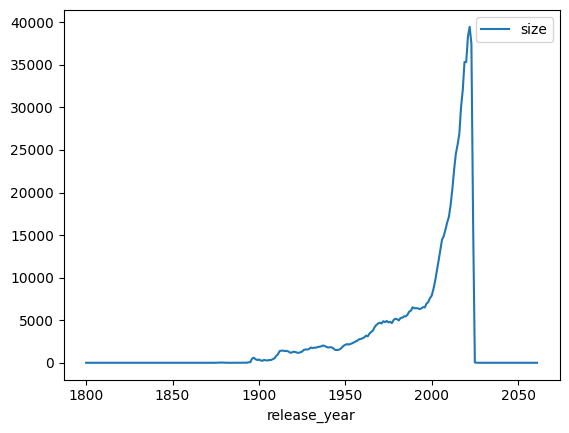

In [ ]:
df[df['status']=='Released'].groupby('release_year', as_index=False).size().plot.line(x='release_year', y='size');

Notiamo che abbiamo ancora qualche film con data futura, infatti il valore massimo per l'anno di rilascio è ora il 2061. Dato che vorremo fare delle analisi su ricavi e popolarità dei film, non ha molto senso tenere dei film che non sono ancora usciti, decidiamo quindi di tenere solo i film usciti entro il 31 ottobre 2024, in modo da escludere i film più recenti per i quali i dati relativi ai ricavi potrebbero essere incompleti.

> Nota: i dati relativi ai film usciti nell'ultimo anno sono comunque da considerarsi incompleti o parziali.

**Per la nostra analisi decidiamo di concentrarci solo sui film che sono usciti entro il 31 ottobre 2024.**

### Genres

Come possiamo vedere nella tabella qui sotto (che mostra quanti film sono categorizzati su ciascun genere in termini assoluti e relativi), quasi il 20% dei film nel nostro dataset è categorizzato come `Documentary`; seguono le categorie `Drama`, `Comedy` e `Animation`.

Notiamo anche che ciascun film può essere categorizzato con più di un genere, ad esempio in settima e ottava posizione troviamo `Drama, Romance` e `Comedy, Drama` con un'incidenza di circa 1.5%.

In [ ]:
genres = df.groupby(['genres'], as_index=False).size().sort_values('size', ascending=False)
genres['pct'] = genres['size']/genres['size'].sum()*100
genres.head(10)

,genres,size,pct
5509,Documentary,132285,19.888773
5982,Drama,102794,15.454863
3839,Comedy,57605,8.660791
2515,Animation,31186,4.688750
9592,Music,25293,3.802750
8856,Horror,21686,3.260445
6956,"Drama, Romance",10274,1.544674
4202,"Comedy, Drama",9394,1.412368
0,Action,7756,1.166098
12085,Thriller,7196,1.081904


Una conseguenza di questo fatto è che il conteggio di film `Drama` che vediamo nella tabella qui sopra non tiene conto di tutti quei film che sono categorizzati `Drama` ma anche `Romance` o `Comedy` e così via; inoltre, questo genera una coda molto lunga di elementi con più generi e pochi film associati come vediamo nella tabella qui sotto:

In [ ]:
genres.tail(10)

,genres,size,pct
5596,"Documentary, Comedy, Action, Romance",1,0.00015
5599,"Documentary, Comedy, Adventure, Family, Romance",1,0.00015
5609,"Documentary, Comedy, Drama, Music",1,0.00015
5601,"Documentary, Comedy, Animation, History, Mystery",1,0.00015
5602,"Documentary, Comedy, Animation, Music",1,0.00015
5604,"Documentary, Comedy, Crime, Thriller",1,0.00015
5606,"Documentary, Comedy, Drama, Adventure",1,0.00015
5607,"Documentary, Comedy, Drama, Animation",1,0.00015
5608,"Documentary, Comedy, Drama, History",1,0.00015
13238,"Western, War, Thriller",1,0.00015


Per ovviare a questo problema dovremmo **ristrutturare** il dataset, andando a isolare le categorie per i film con più generi. Questo processo "explode" il dataset, andando ad creare molte più osservazioni di quelle attuali, perché di fatto andiamo a duplicare le osservazioni per separare il genere ad ogni riga.

Una soluzione alternativa (che useremo nella nostra dashboard di Tableau) è di **tenere solo il primo genere** che si trova nella stringa `genres`, ipotizzando che sia la più rappresentativa. Questo metodo è più approssimativo (in quanto perdiamo delle informazioni), ma è anche molto più pratico ed efficiente per il nostro caso d'uso.

## Incorporazione di dati esterni

#### Nome della lingua esteso

Come abbiamo notato nella sezione dedicata all'analisi delle lingue, la maggioranza dei film è di origine anglosassone, ma ci sono comunque diversi film in altre lingue; la variabile `original_language` contiene però un codice che identifica la lingua (e non il nome della lingua per esteso). Per avere una corrispondenza tra il codice e il nome della lingua andremo a usare e incorporare [questo dataset](https://raw.githubusercontent.com/datasets/language-codes/master/data/language-codes.csv).

In [ ]:
# carichiamo il dataset
lang = pd.read_csv('https://storage.googleapis.com/data_week_2024_11/language_codes.csv')
# rinominiamo le colonne, in particolare la prima (che useremo come chiave comune tra i due dataset)
# e le diamo lo stesso nome della sua corrispondente nel nostro dataset di partenza (original_language)
lang.columns=['original_language','language']
lang.head(3)

,original_language,language
0,aa,Afar
1,ab,Abkhazian
2,ae,Avestan


In [ ]:
# uniamo i due dataset con un'operazione di join (metodo .merge() della libreria Pandas)
df = df.merge(lang, how='left', on='original_language')
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,release_year,language
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",2010.0,English
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",2014.0,English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",2008.0,English


In [ ]:
# possiamo quindi osservare che l'inglese è la lingua più popolare, seguito dal francese, spagnolo e tedesco
df.groupby('language', as_index = False).size().sort_values('size', ascending=False).head(10)

,language,size
40,English,528710
46,French,62173
137,Spanish; Castilian,56327
52,German,46737
71,Japanese,41295
29,Chinese,38497
117,Portuguese,31516
123,Russian,23203
70,Italian,22678
82,Korean,12634


Verifichiamo se nel processo di incorporazione (merge) dei nuovi dati (la lingua per esteso) ci sono stati dei casi in cui non c'è stata una corrispondenza tra i due dataset e hanno quindi prodotto un valore mancante nella nuova colonna `language`:

In [ ]:
df[df['language'].isna()].groupby(['original_language'], as_index=False).size()

,original_language,size
0,cn,5103
1,mo,50
2,sh,1599
3,xx,5467


Notiamo come effettivamente ci siano 4 codici della variabile `original_language` (dataset di partenza) che non hanno trovato una corrispondenza con la variabile `language` contenuta nel nuovo dataset che abbiamo importato.

Come possiamo vedere in [questa pagina Wikipedia](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes), i codici `mo` ed `sh` non vengono più usati (sono stati deprecati) e si riferiscono alle lingue moldava e serbo-croata, rispettivamente.

Una breve occhiata al contenuto dei titoli originali con lingua `cn` ci fa capire che si tratta di film in lingua cinese:

In [ ]:
df[df['original_language']=='cn'][['title', 'original_title']].head()

,title,original_title
1291,Ip Man,葉問
1788,Kung Fu Hustle,功夫
1886,In the Mood for Love,花樣年華
2110,Ip Man 2,葉問2
2171,Shaolin Soccer,少林足球


Infine, i titoli associati al codice `xx` sembrano essere misti e di non chiara provenienza; inoltre il codice `xx` non è associato a nessuna lingua, è quindi ragionevole assumere che siano titoli senza una lingua associata, rendendoli così dei valori mancanti.

In [ ]:
df[df['original_language']=='xx'][['title', 'original_title']].head()

,title,original_title
8358,Lights Out,Lights Out
12384,Roundhay Garden Scene,Roundhay Garden Scene
13933,Father and Daughter,Father and Daughter
15538,One Small Step,One Small Step
16060,Mr Hublot,Mr Hublot


Dobbiamo ora decidere come categorizzare i film associati a questi codici nella variabile `language` (che al momento non ha nessun valore per questi codici); non c'è una regola fissa in questi casi, si potrebbero infatti intraprendere diverse strade, nel nostro caso agiamo come segue per ciascun codice:
- `mo`: creare una nuova lingua `Moldovan`
- `sh`: creare una nuova lingua `Serbian; Croatian`
- `cn`: associare la lingua già esistente `Chinese`
- `xx`: segnare queste ossevazioni con un valore mancante


In [ ]:
df.loc[df['original_language']=='mo', 'language'] = 'Moldovan'
df.loc[df['original_language']=='sh', 'language'] = 'Serbian; Croatian'
df.loc[df['original_language']=='cn', 'language'] = 'Chinese'
df.loc[df['original_language']=='xx', 'language'] = pd.NA

Verifichiamo che non ci siano più codici con valori mancanti (oltre al codice `xx`):

In [ ]:
df[df['language'].isna()].groupby(['original_language'], as_index=False).size()

,original_language,size
0,xx,5467


**Alternativa con ChatGPT**

Una soluzione alternativa è usare un Large Language Model per aiutarci a integrare queste informazioni. L'idea è la seguente:
1. Recuperiamo la lista di lingue senza duplicati
2. La salviamo su un file CSV in locale
3. Carichiamo il file su ChatGPT
4. Chiediamo al LLM di recuperare e integrare le informazioni mancanti (qui sarà molto importante essere efficaci nella scrittura del prompt)

Partiamo recuperando e salvando la lista dei codici delle lingue su un file CSV.

In [ ]:
lang_codes = pd.DataFrame({'lang_codes' : df['original_language'].sort_values().unique(),
              'lang_name': np.nan})
lang_codes.to_csv('lang_codes.csv', index=False)

A questo punto, carichiamo il file su ChatGPT come allegato e aggiungiamo il seguente prompt:

> Il file in allegato contiene due colonne. La prima colonna "lang_codes" contiene una lista di codici che identificano una lingua usando 2 caratteri (ad esempio "it" sta per "Italian" o "en" sta per "English", ecc). La seconda colonna "lang_names" al momento è vuota. Sostituisci gli elementi della seconda colonna con i rispettivi nomi per esteso delle lingue come negli esempi che ti ho fornito poco fa. Restituisci come output un nuovo file csv contenente entrambe le colonne.

Una volta finito di elaborare la nostra richiesta, andiamo a visualizzare il contenuto del file che l'LLM ci ha restituito come output.

> *Nota: i Large Language Models possono sbagliare, quindi è molto importante verificare sempre e in maniera accurata i risultati e non fidarsi ciecamente di quello che ci viene restituito.*

#### Nome del regista

Un dato molto importante che manca nel nostro dataset è quello relativo al regista e al cast di ciascun film. Per nostra fortuna, una delle colonne fornite è `imdb_id`, ovvero l'id su IMDB del film in questione.

Su Kaggle abbiamo trovato [questo dataset](https://www.kaggle.com/datasets/ashishjangra27/imdb-movies-dataset) contenente oltre 2.5 milioni di film dal database di IMDB, dove troviamo sia l'id di IMDB dei film che il regista e cast relativi al film.

In [ ]:
directors = pd.read_csv('https://storage.googleapis.com/data_week_2024_11/movies_directors.csv')

<ipython-input-79-5c5a4d3f5088>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  directors = pd.read_csv('https://storage.googleapis.com/data_week_2024_11/movies_directors.csv')


In [ ]:
directors.head(3)

,id,name,year,rating,certificate,duration,genre,votes,gross_income,directors_id,directors_name,stars_id,stars_name,description
0,tt4710316,Best in Sex: 2015 AVN Awards,(2015 TV Special),4.0,TV-MA,94 min,"Adult, News",124.0,0,nm1624094,Gary Miller,"nm4766272,nm2670531,nm4920605,nm6284246","Farrah Laurel Abraham,Asa Akira,Anikka Albrite...",The hottest adult stars and top adult movies a...
1,tt1281857,Naughty Novelist,(2008 Video),3.8,Not Certified,88 min,Adult,174.0,0,nm0045256,John Bacchus,"nm0128986,nm1969196,nm0451160,nm6130462","Darian Caine,Jackie Stevens,A.J. Khan,Arrora",Darian is a successful journalist but when she...
2,tt2294954,2011 AVN Awards Show,(2011 TV Special),5.7,Not Certified,83 min,"Adult, News",39.0,0,"nm1624094,nm0754845","Gary Miller,Timothy E. Sabo","nm2200343,nm2670531,nm1267549,nm3585599","Aubrey Addams,Asa Akira,Monique Alexander,Rave...",Add a Plot


Come per i nomi estesi delle lingue, anche in questo caso possiamo usare il metodo `.merge()` per unire il nostro dataset di partenza con quello dei registi.

In [ ]:
df_ckpnt_2 = df.copy()

# merge the df and directors dataframe on the imdb_id variable
df = df.merge(directors, how='left', left_on='imdb_id', right_on='id')

### Selezione delle colonne

A questo punto selezioniamo solo le variabili che vogliamo tenere nel nostro dataset; per fare ciò, ricordiamoci quali variabili sono attualmente presenti:

In [ ]:
df.columns

Index(['id_x', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'backdrop_path', 'budget', 'homepage',
       'original_title', 'overview', 'popularity', 'poster_path', 'tagline',
       'genres', 'production_countries', 'keywords', 'release_year',
       'language', 'certificate', 'directors_name', 'stars_name'],
      dtype='object')

Possiamo evitare di portarci dietro alcune variabili ridondanti o che non pensiamo possano servirci nella nostra analisi, questo ridurrà la grandezza del nostro dataset e renderà più veloce e semplice la nostra analisi.

Decidiamo di rimuovere le seguenti variabili:
- Dal dataset originale:
  - adult
  - imdb_id
  - original_language
  - production_companies
  - spoken_languages
- Dal dataset dei registi:
  - id_y
  - name
  - year
  - rating
  - duration
  - genre
  - votes
  - gross_income
  - directors_id
  - stars_id
  - description

In [ ]:
df = df[['id_x', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'backdrop_path', 'budget', 'homepage',
       'original_title', 'overview', 'popularity', 'poster_path',
       'tagline', 'genres', 'production_countries', 'keywords', 'release_year',
       'language', 'certificate', 'directors_name', 'stars_name']]

Rinominiamo la variabile `id_x` a `id` (com'era prima dell'ultimo merge).

In [ ]:
df = df.rename(columns={'id_x':'id'})

In [ ]:
# facciamo un check veloce del nostro dataset
print(f'Shape: {df.shape}')
df.head(3)

Shape: (1022774, 24)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,backdrop_path,budget,...,poster_path,tagline,genres,production_countries,keywords,release_year,language,certificate,directors_name,stars_name
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,...,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","United Kingdom, United States of America","rescue, mission, dream, airplane, paris, franc...",2010.0,English,PG-13,Christopher Nolan,"Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,...,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","United Kingdom, United States of America","rescue, future, spacecraft, race against time,...",2014.0,English,PG-13,Christopher Nolan,"Matthew McConaughey,Anne Hathaway,Jessica Chas..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,...,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","United Kingdom, United States of America","joker, sadism, chaos, secret identity, crime f...",2008.0,English,PG-13,Christopher Nolan,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich..."


## Filtriamo e salviamo i dati

Prima di procedere, filtriamo il nostro DataFrame `df` per:
- `status == Released`
- `60 <= runtime <= 270`
- `release_date <= 31/10/2024`

In [ ]:
print(f'Shape before filter: {df.shape}')
# salviamo una copia del DataFrame completo come backup
df_ckpnt_3 = df.copy()
# ora procediamo a filtrare il DataFrame df_out
df = df[(df['status']=='Released') & (df['runtime']>=60) & (df['runtime']<=270) & (df['release_date'] <= pd.to_datetime('31/10/2024', format="%d/%m/%Y"))]
print(f'Shape after filter: {df.shape}')

Shape before filter: (1022774, 24)
Shape after filter: (348849, 24)


E infine salviamo una copia dei dati nel file `tmdb_out.csv`:

In [ ]:
df.to_csv('tmdb_out.csv', index=False)

## Considerazioni finali

Abbiamo quindi generato il dataset finale:
- tmdb_out.csv

Il dataset è stato filtrato per escludere:
- film senza un titolo
- film con contenuti per soli adulti
- film non ancora rilasciati al pubblico
- film con durata inferiore ai 60 minuti o superiore ai 270 minuti
- film rilasciati dopo il 31/10/2024

Inoltre abbiamo integrato le seguenti informazioni aggiuntive:
- Lingua del film per esteso
- Nome del regista
- Nomi principali del cast

La fase finale di visualizzazione e presentazione dei dati verrà effettuata in Tableau, dove useremo il dataset appena esportato per rispondere alle domande definite nella sezione degli obiettivi.

Ecco il [link alla dashboard](https://public.tableau.com/app/profile/booleaner/viz/MovieAnalytics_17320092380960/AnalisidelCinema) che abbiamo creato e pubblicato su Tableau Public.